## Predictive Analysis For Breast Cancer Diagnosis

[Dataset sourced from Kaggle](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data)

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [7]:
df = pd.read_csv("breast-cancer.csv")

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
pd.options.display.max_columns = None
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### Main Cell Attributes
- Radius
- Texture
- Perimeter
- Area
- Smoothness
- Compactness
- Concavity
- Concave Points
- Symmetry
- Fractal Dimension

In [21]:
df_corr = df.copy()

## Map 'M' to 1 (malignant), 'B' to 0 (benign)
df_corr['diagnosis'] = df_corr['diagnosis'].map({'M': 1, 'B': 0})

## drop redundant id column
df_corr = df_corr.drop(columns=['id'])

### Check for null values and duplicated datapoints

In [22]:
df_corr.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [23]:
df_corr.loc[df_corr.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


### EDA

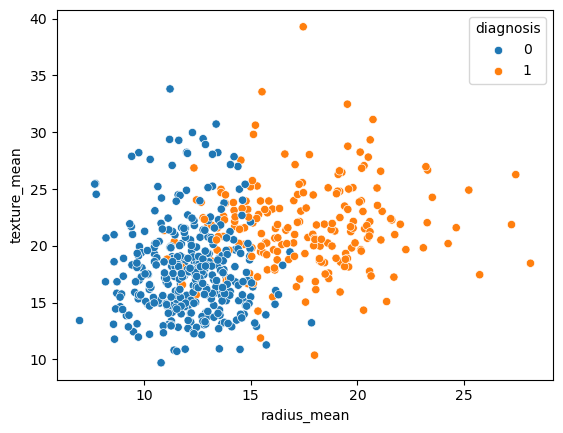

In [24]:
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df_corr)
plt.show()

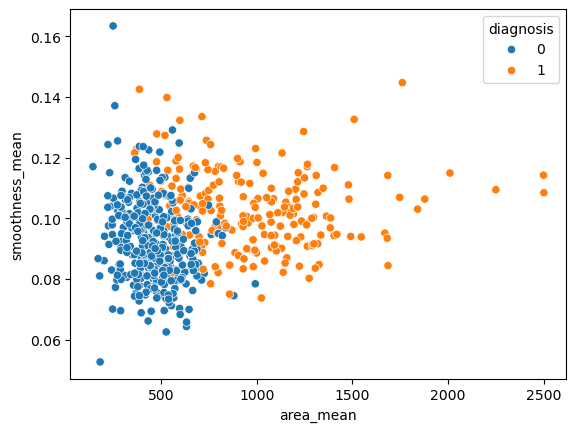

In [25]:
sns.scatterplot(x='area_mean', y='smoothness_mean', hue='diagnosis', data=df_corr)
plt.show()

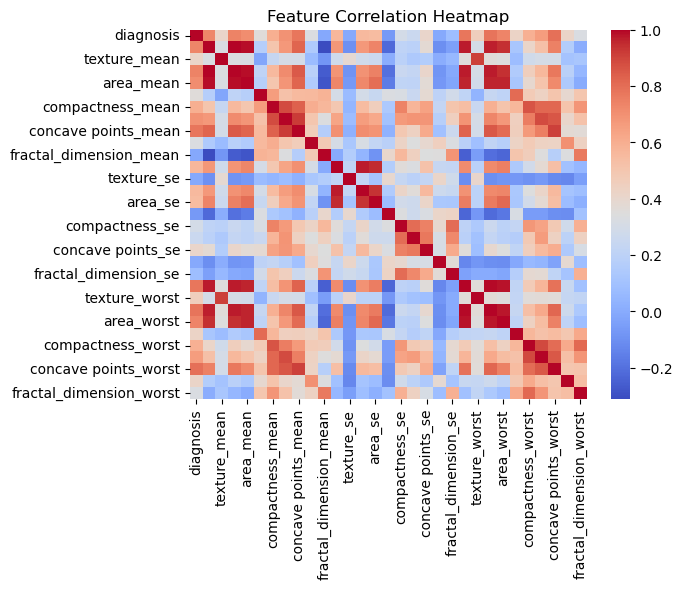

In [27]:
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

Correlation matrix:
                radius_mean  perimeter_mean  area_mean
radius_mean        1.000000        0.997855   0.987357
perimeter_mean     0.997855        1.000000   0.986507
area_mean          0.987357        0.986507   1.000000


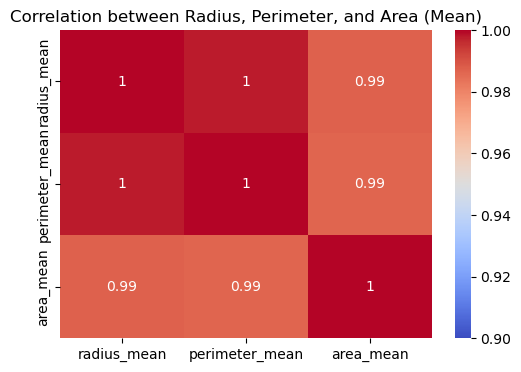

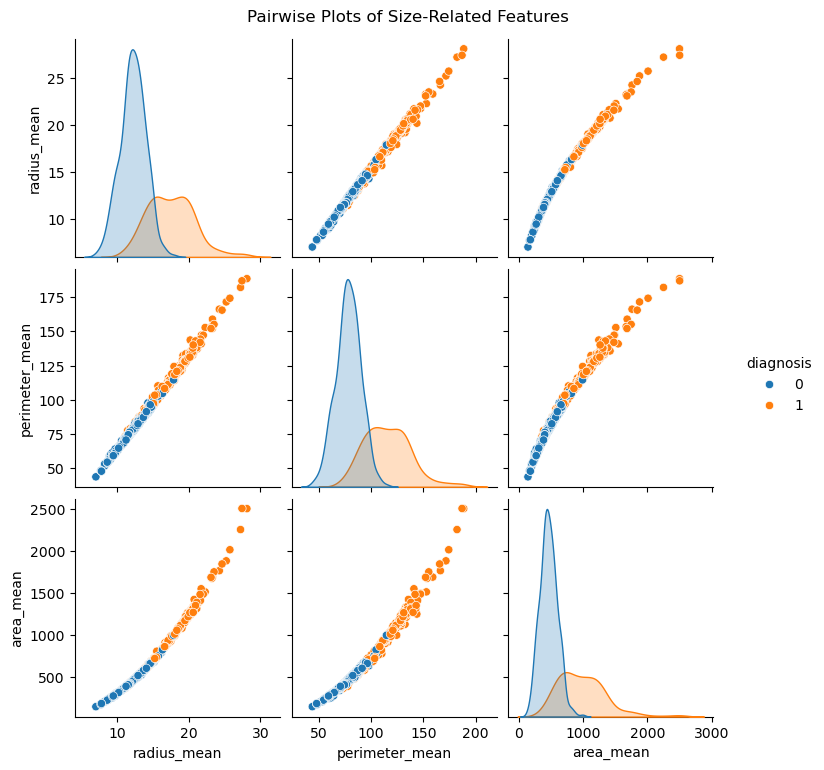

In [34]:
size_features = ['radius_mean', 'perimeter_mean', 'area_mean']

# correlation matrix
corr_size = df_corr[size_features].corr()
print("Correlation matrix:")
print(corr_size)

# heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_size, annot=True, cmap='coolwarm', vmin=0.9, vmax=1)
plt.title("Correlation between Radius, Perimeter, and Area (Mean)")
plt.show()

# pairplot
sns.pairplot(df_corr[size_features + ['diagnosis']], hue='diagnosis', diag_kind='kde')
plt.suptitle("Pairwise Plots of Size-Related Features", y=1.02)
plt.show()

**Since radius, perimeter and area are highly correlated, we will only keep radius.**

In [35]:
## drop perimeter and area
df_corr = df_corr.drop(columns=['perimeter_mean', 'perimeter_se', 'perimeter_worst', 'area_mean', 'area_se', 'area_worst'])

In [36]:
df_corr.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

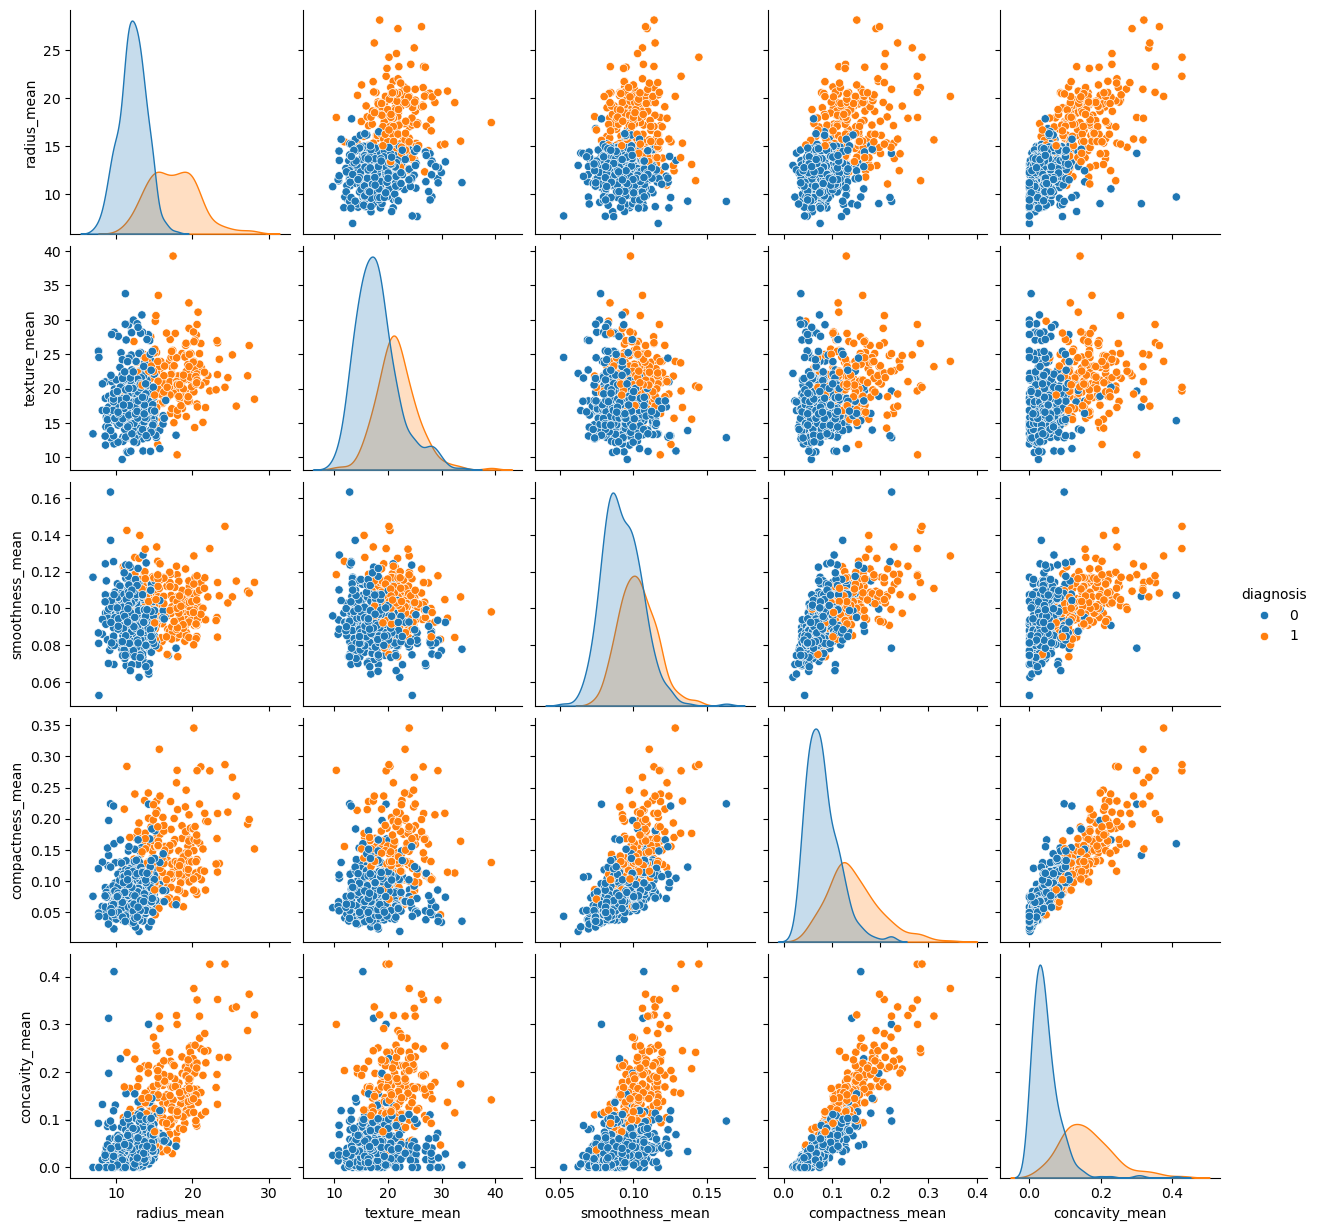

In [38]:
sns.pairplot(df_corr, vars=['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean'], hue='diagnosis')
plt.show()

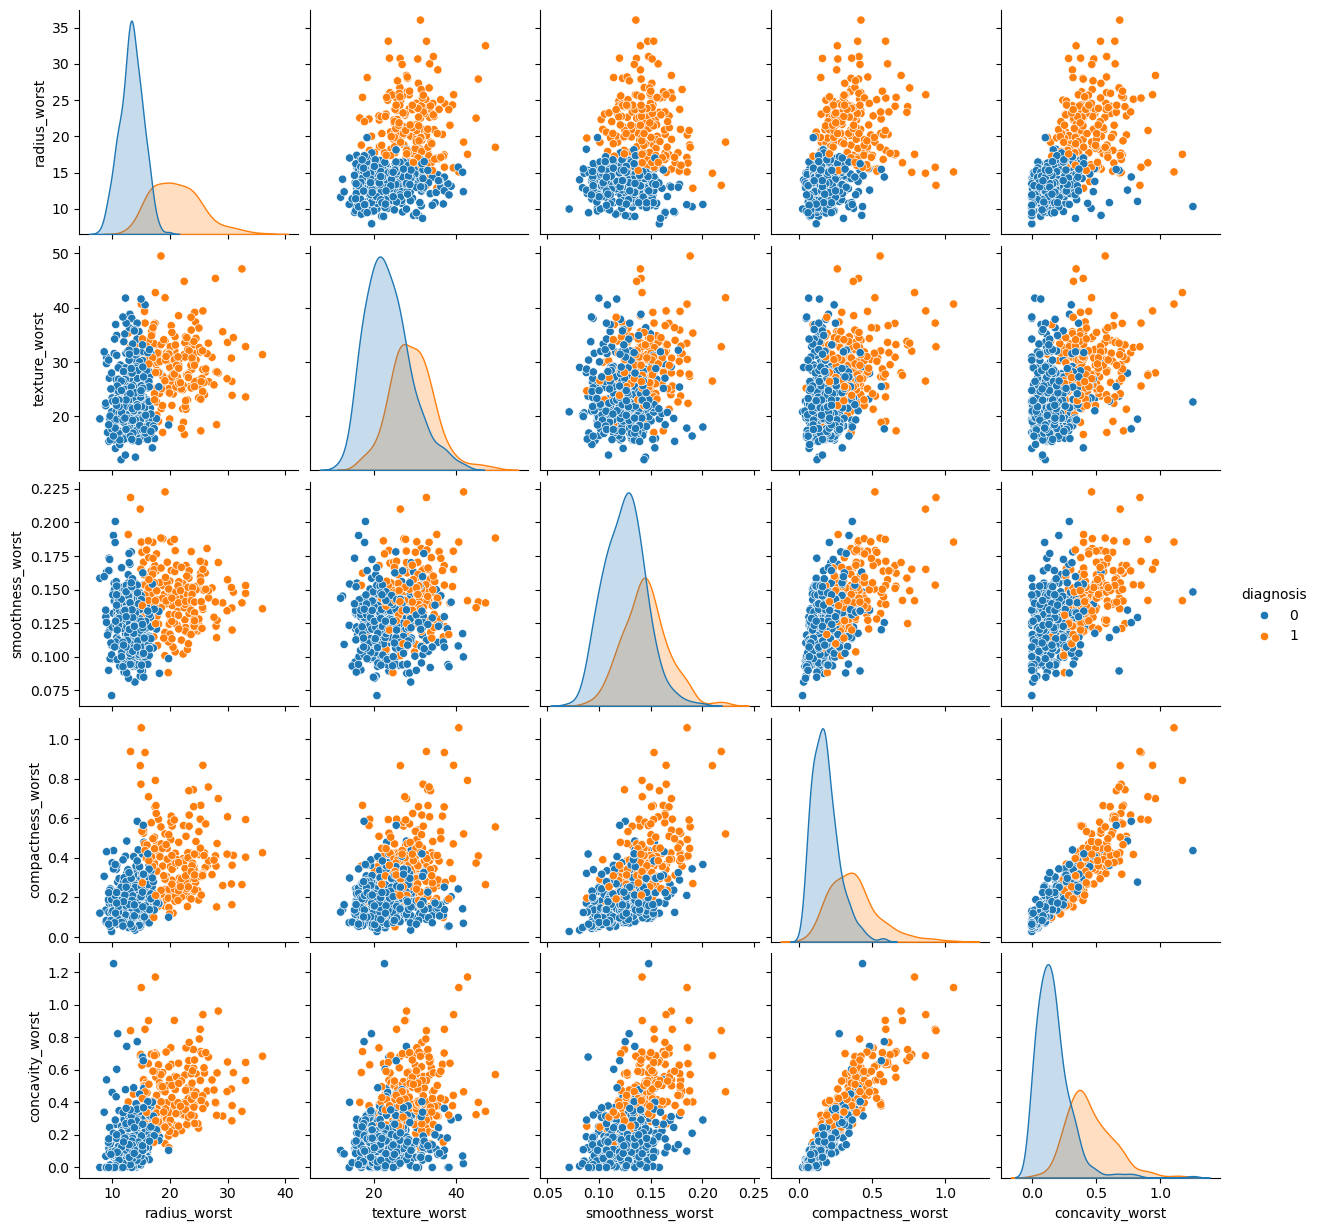

In [39]:
sns.pairplot(df_corr, vars=['radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst'], hue='diagnosis')
plt.show()

## Feature Importance Ranking

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df_corr.copy()
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [55]:
from sklearn.ensemble import RandomForestClassifier

# use random forest classifier to rank features by their importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=df.drop(columns=['diagnosis']).columns)
rf_importances = rf_importances.sort_values(ascending=False)

print("Random Forest Feature Importances:")
print(rf_importances)

Random Forest Feature Importances:
concave points_worst       0.190864
radius_worst               0.159363
concave points_mean        0.153520
radius_mean                0.086372
concavity_mean             0.065123
concavity_worst            0.064831
radius_se                  0.046100
compactness_mean           0.031604
compactness_worst          0.028782
texture_worst              0.023604
texture_mean               0.022236
concavity_se               0.020222
symmetry_worst             0.012473
fractal_dimension_mean     0.011533
concave points_se          0.011351
smoothness_worst           0.010172
smoothness_mean            0.009231
fractal_dimension_se       0.009150
compactness_se             0.008348
smoothness_se              0.008180
symmetry_se                0.008145
fractal_dimension_worst    0.006473
texture_se                 0.006380
symmetry_mean              0.005942
dtype: float64


### Feature Selection Decision

We evaluated feature importance using a Random Forest classifier.  
The importance scores represent each feature's contribution to reducing impurity across the model's decision trees.  
The results show that a small subset of features — such as `concave points_worst`, `radius_worst`, and `concave points_mean` — carry most of the predictive power, while many features contribute minimally.

To simplify the model and reduce noise, we will **drop features with importance < 0.01**.  
These features provide negligible improvement to classification performance and are likely redundant given the strong predictors already present.

In [56]:
low_importance_features = rf_importances[rf_importances < 0.01].index.tolist()
low_importance_features

['smoothness_mean',
 'fractal_dimension_se',
 'compactness_se',
 'smoothness_se',
 'symmetry_se',
 'fractal_dimension_worst',
 'texture_se',
 'symmetry_mean']

In [57]:
df = df.drop(columns=low_importance_features)

In [58]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'fractal_dimension_mean',
       'radius_se', 'concavity_se', 'concave points_se', 'radius_worst',
       'texture_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')

## Training Classifier Model
We will be focusing on Gradient Boosted Decision Tree and SVM, evaluating which model performs better at the end.

### Gradient Boosted Decision Tree

In [148]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)
X_train.shape

(426, 16)

In [149]:
X_test.shape

(143, 16)

In [150]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3
)

In [151]:
from sklearn.model_selection import cross_val_score, cross_val_predict

accuracies = cross_val_score(gbdt, X_train, y_train, cv=5, scoring="accuracy")

print(f"Cross-validation Accuracy: {np.mean(accuracies)*100:.2f}%")

Cross-validation Accuracy: 96.01%


In [152]:
gbdt.fit(X_train, y_train)
gbdt.score(X_test, y_test)

0.958041958041958

### Plotting ROC Curve

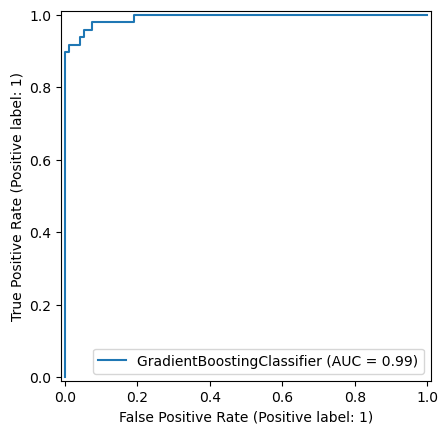

In [153]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, roc_auc_score

RocCurveDisplay.from_estimator(gbdt, X_test, y_test)

In [154]:
y_pred = gbdt.predict(X_test)
# fpr = false positive rate
# tpr = true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_roc_data = auc(fpr, tpr)
print(f'False Positive Rate (fpr): {fpr[1]}')
print(f'True Positive Rate (tpr): {tpr[1]}')
print(f'AUC_ROC Score: {auc_roc_data}')

False Positive Rate (fpr): 0.021052631578947368
True Positive Rate (tpr): 0.9166666666666666
AUC_ROC Score: 0.9478070175438597


### Support Vector Machine (SVM)
Exploration with SVC (Support Vector Classifier) from scikit-learn.

In [155]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [156]:
clf.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'


In [157]:
clf.score(X_test, y_test)

0.986013986013986

### Plotting ROC Curve

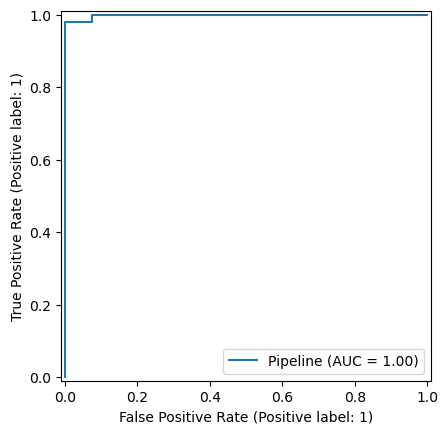

In [158]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

In [159]:
y_pred = clf.predict(X_test)
# fpr = false positive rate, tpr = true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_roc_data = auc(fpr, tpr)
print(f'False Positive Rate (fpr): {fpr[1]}')
print(f'True Positive Rate (tpr): {tpr[1]}')
print(f'AUC_ROC Score: {auc_roc_data}')

False Positive Rate (fpr): 0.010526315789473684
True Positive Rate (tpr): 0.9791666666666666
AUC_ROC Score: 0.9843201754385963


### Improving SVM - tuning hyperparameters

Use GridSearchCV to perform hyperparameter tuning on an SVM pipeline with cross-validation to find the best C, gamma, and kernel.

In [160]:
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(StandardScaler(), SVC())

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'svc__kernel': ['rbf', 'poly', 'linear']
}

# grid search
grid = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best CV (mean ± std):", grid.best_score_,
      "+/-", grid.cv_results_['std_test_score'][grid.best_index_])
print("Test score of best estimator:", grid.best_estimator_.score(X_test, y_test))


Best CV (mean ± std): 0.9717920656634746 +/- 0.01414963660615104
Test score of best estimator: 0.965034965034965


In [164]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

base = make_pipeline(StandardScaler(), SVC())             
tuned = grid.best_estimator_                             

for name, model in [("base", base), ("tuned", tuned)]:
    s = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1)
    print(name, s.mean(), s.std())
    
print("Base test score:", base.fit(X_train, y_train).score(X_test, y_test))
print("Tuned test score:", tuned.fit(X_train, y_train).score(X_test, y_test))
print("----")

base 0.9679160966712267 0.013897841227262089
tuned 0.968700410396717 0.018029258477902425
Base test score: 0.986013986013986
Tuned test score: 0.965034965034965
----


Hyperparameter tuning with `GridSearchCV` explored different values of `C`, `gamma`, and `kernel` for the SVM pipeline.  
The search selected `kernel='linear'` and `C=0.1` as the best configuration, achieving a mean cross-validation score of 0.9687 ± 0.0180, compared to the baseline’s 0.9679 ± 0.0139. 
This small difference falls within the variation of the cross-validation results, indicating no statistically significant improvement.  
Evaluation on the held-out test set confirmed identical accuracy (**0.9860**) for both the tuned and baseline models, suggesting that the original SVM setup was already near-optimal for this dataset.


## Conclusion
In this project, we built a breast cancer diagnosis classifier by (1) cleaning and exploring the data, (2) selecting a compact, high-signal feature set, and (3) benchmarking Gradient Boosted Trees against an SVM. After dropping highly collinear size-based attributes and low-importance predictors, the final model—an SVM with standardization—delivered the strongest performance on a 75/25 train–test split (426/143): **98.6014% test accuracy** and **0.984320 AUC_ROC**, outperforming Gradient Boosted Trees. A subsequent hyperparameter search did not improve upon the baseline SVM, so we retain the simpler configuration for robustness and clarity.

---

#### **Exploratory Data Analysis & Feature Selection**
- Mapped labels (`M`→1, `B`→0) and removed the redundant `id` column.
- Verified **no missing values** and **no duplicate rows** in the dataset.
- Identified extreme multicollinearity among size-related features:
  - Mean-feature correlations: `radius_mean`–`perimeter_mean` **0.9979**, `radius_mean`–`area_mean` **0.9874**, `perimeter_mean`–`area_mean` **0.9865**.
  - **Action:** dropped all `perimeter_*` and `area_*` columns; retained radius-based features to represent size.
- Ranked features with a Random Forest; **dropped features with importance < 0.01**:
  - Removed: `smoothness_mean`, `fractal_dimension_se`, `compactness_se`, `smoothness_se`, `symmetry_se`, `fractal_dimension_worst`, `texture_se`, `symmetry_mean`.
- Final feature set: **16 predictors**; Top features:
  - `concave points_worst`, `radius_worst`, `concave points_mean`, `radius_mean`, `concavity_mean`, `concavity_worst`.

---

#### **Model Training & Evaluation**
- Explored training Gradient Boosted Decision Tree Classifier and Support Vector Machine (SVM) models
- Visualised AUC_ROC curves for both types of models and compared performance
- Concluded that SVM model performed better:

|                       | Test Accuracy | AUC_ROC Score |
|-----------------------|---------------|---------------|
| SVM                   | 98.6014%      | 0.984320      |
| Gradient Boosted Tree | 95.8042%      | 0.947807      |

---

#### **Hyperparameters Tuning**
- Performed **GridSearchCV (5-fold)** on an SVM pipeline with:
  - `C ∈ {0.1, 1, 10, 100}`, `gamma ∈ {scale, auto, 0.01, 0.1, 1}`, `kernel ∈ {rbf, poly, linear}`.
- **Best cross-val score:** **0.9718 ± 0.0141**; **test score of best estimator:** **0.9650**.
- Compared baseline vs tuned using **RepeatedStratifiedKFold (5×3)**:
  - **Baseline SVM (defaults):** CV **0.9679 ± 0.0139**; **test 0.9860**.
  - **Tuned SVM (Grid best):** CV **0.9687 ± 0.0180**; **test 0.9650**.
- **Conclusion:** tuning did **not** improve test performance; kept the baseline SVM for the final model.

---

#### **Final SVM Model Performance Metrics**
| Metric                    | Score    |
|---------------------------|----------|
| Test Accuracy             | 98.6014% |
| AUC Score                 | 0.984320 |
| False Positive Rate (fpr) | 0.010526 |
| True Positive Rate (tpr)  | 0.979166 |